**** Jenna Nowland

** Data Idea 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
file_path = "Coke_Data_Data400.xlsx"  

sheet_names = ['North_America', 'Latin_America', 'Europe', 'Asia-Pacific']

sheets = pd.read_excel(file_path, sheet_name=sheet_names)  


for sheet_name, df in sheets.items():
    print(f"Sheet Name: {sheet_name}")
    print(df.head())  

Sheet Name: North_America
         Country  PDI  IDV  MTS  UAI  LTO  IVR  \
0  United States   40   60   62   46   50   68   
1         Canada   39   72   52   48   54   68   

   Consumption of Coke in Millions of Liters 2024  GDP in Millions(2023)  \
0                                           39300            27720709.00   
1                                            4300             2142470.91   

   AVG Monthly Income  AVG Annual Income  
0                6704              80450  
1                5403              54040  
Sheet Name: Latin_America
  Country  PDI  IDV  MTS  UAI  LTO  IVR  \
0  Mexico   81   34   69   82   23   97   
1  Brazil   69   36   49   76   28   59   

   Consumption of Coke in Millions of Liters 2024  GDP in Millions(2023)  \
0                                           19500             1789114.43   
1                                            8700             2173665.66   

   AVG Monthly Income  AVG Annual Income  
0                 998              11

In [3]:
dataframes = {sheet: df for sheet, df in sheets.items()}

# Accessing a DataFrame
print(dataframes["North_America"].head())  
print(dataframes["Latin_America"].head())  
print(dataframes["Europe"].head())         
print(dataframes["Asia-Pacific"].head())

         Country  PDI  IDV  MTS  UAI  LTO  IVR  \
0  United States   40   60   62   46   50   68   
1         Canada   39   72   52   48   54   68   

   Consumption of Coke in Millions of Liters 2024  GDP in Millions(2023)  \
0                                           39300            27720709.00   
1                                            4300             2142470.91   

   AVG Monthly Income  AVG Annual Income  
0                6704              80450  
1                5403              54040  
  Country  PDI  IDV  MTS  UAI  LTO  IVR  \
0  Mexico   81   34   69   82   23   97   
1  Brazil   69   36   49   76   28   59   

   Consumption of Coke in Millions of Liters 2024  GDP in Millions(2023)  \
0                                           19500             1789114.43   
1                                            8700             2173665.66   

   AVG Monthly Income  AVG Annual Income  
0                 998              11980  
1                 773               9280  
   

In [4]:
North_America = sheets["North_America"]
Latin_America = sheets["Latin_America"]
Europe = sheets["Europe"]
Asia_Pacific = sheets["Asia-Pacific"]  # Renamed variable to avoid '-' issue

# Example: Print the first few rows of each DataFrame
print(North_America.head())
print(Latin_America.head())
print(Europe.head())
print(Asia_Pacific.head())  

         Country  PDI  IDV  MTS  UAI  LTO  IVR  \
0  United States   40   60   62   46   50   68   
1         Canada   39   72   52   48   54   68   

   Consumption of Coke in Millions of Liters 2024  GDP in Millions(2023)  \
0                                           39300            27720709.00   
1                                            4300             2142470.91   

   AVG Monthly Income  AVG Annual Income  
0                6704              80450  
1                5403              54040  
  Country  PDI  IDV  MTS  UAI  LTO  IVR  \
0  Mexico   81   34   69   82   23   97   
1  Brazil   69   36   49   76   28   59   

   Consumption of Coke in Millions of Liters 2024  GDP in Millions(2023)  \
0                                           19500             1789114.43   
1                                            8700             2173665.66   

   AVG Monthly Income  AVG Annual Income  
0                 998              11980  
1                 773               9280  
   

In [5]:
for sheet_name, df in sheets.items():
    df["Region"] = sheet_name  # Label each row with its respective region

# Combine all sheets into one DataFrame
combined_df = pd.concat(sheets.values(), ignore_index=True)

# Select only the desired columns
columns_to_keep = [
    "Country", 
    "Consumption of Coke in Millions of Liters 2024", 
    "GDP in Millions(2023)", 
    "AVG Monthly Income", 
    "AVG Annual Income", 
    "Region"
]
combined_df = combined_df[columns_to_keep]

# Sort by "Consumption of Coke in Millions of Liters 2024" in descending order
combined_df = combined_df.sort_values(by="Consumption of Coke in Millions of Liters 2024", ascending=False)

# Display the top-ranked countries
print(combined_df)

          Country  Consumption of Coke in Millions of Liters 2024  \
0   United States                                           39300   
2          Mexico                                           19500   
7           China                                           10800   
3          Brazil                                            8700   
9           Japan                                            7500   
5         Germany                                            6800   
8           India                                            5900   
4  United Kingdom                                            4900   
1          Canada                                            4300   
6           Spain                                            3400   

   GDP in Millions(2023)  AVG Monthly Income  AVG Annual Income         Region  
0            27720709.00                6704              80450  North_America  
2             1789114.43                 998              11980  Latin_America

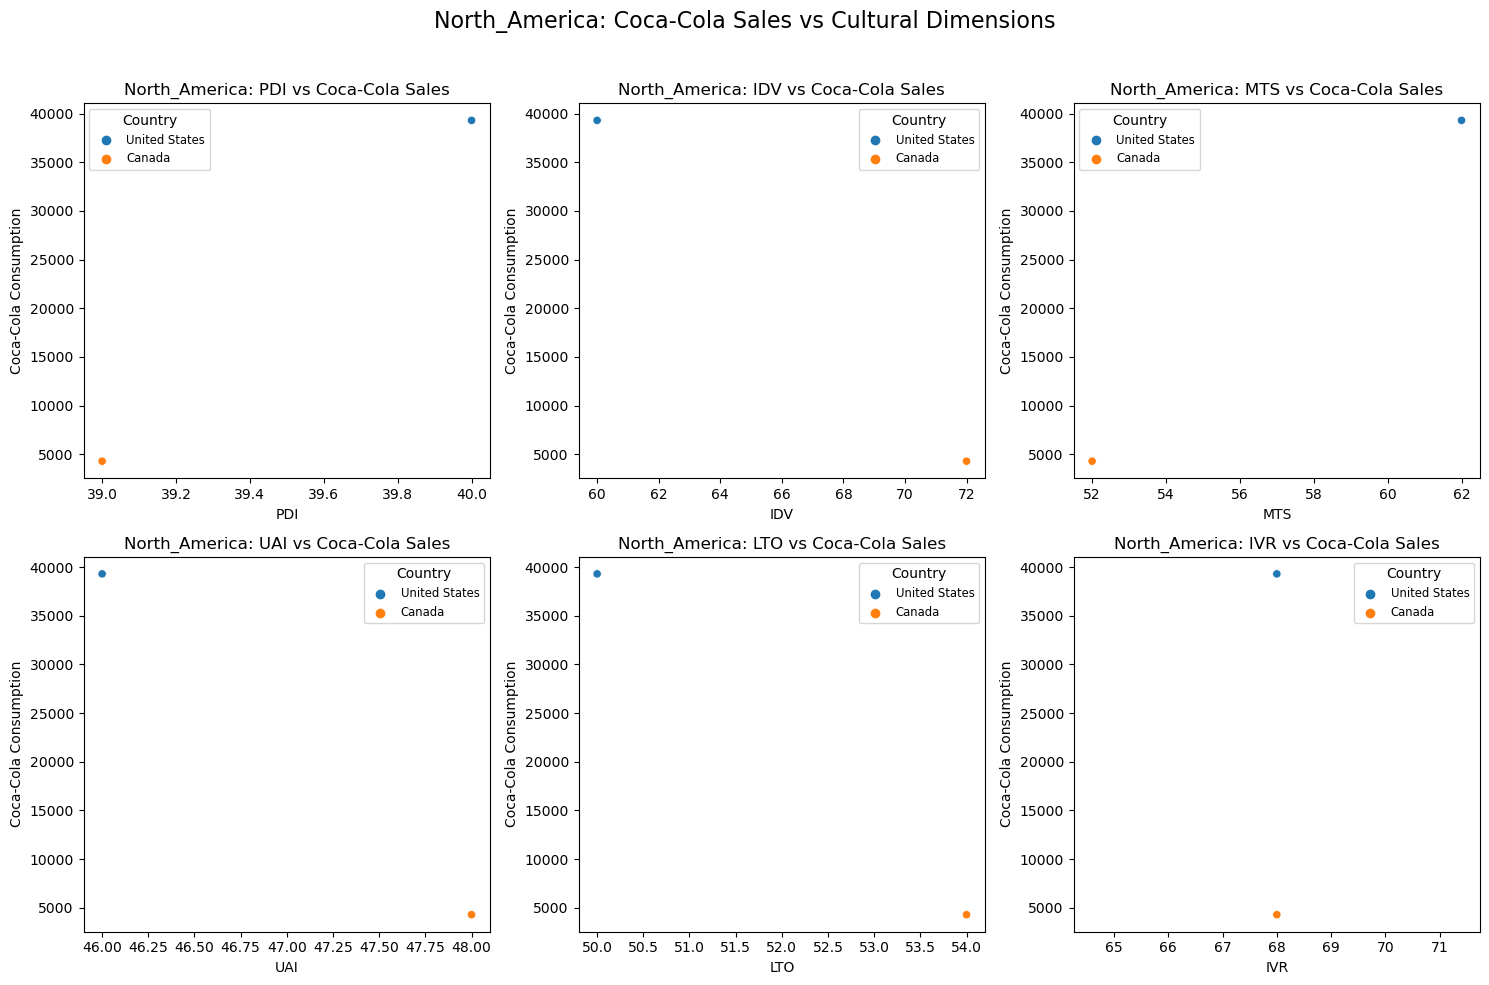

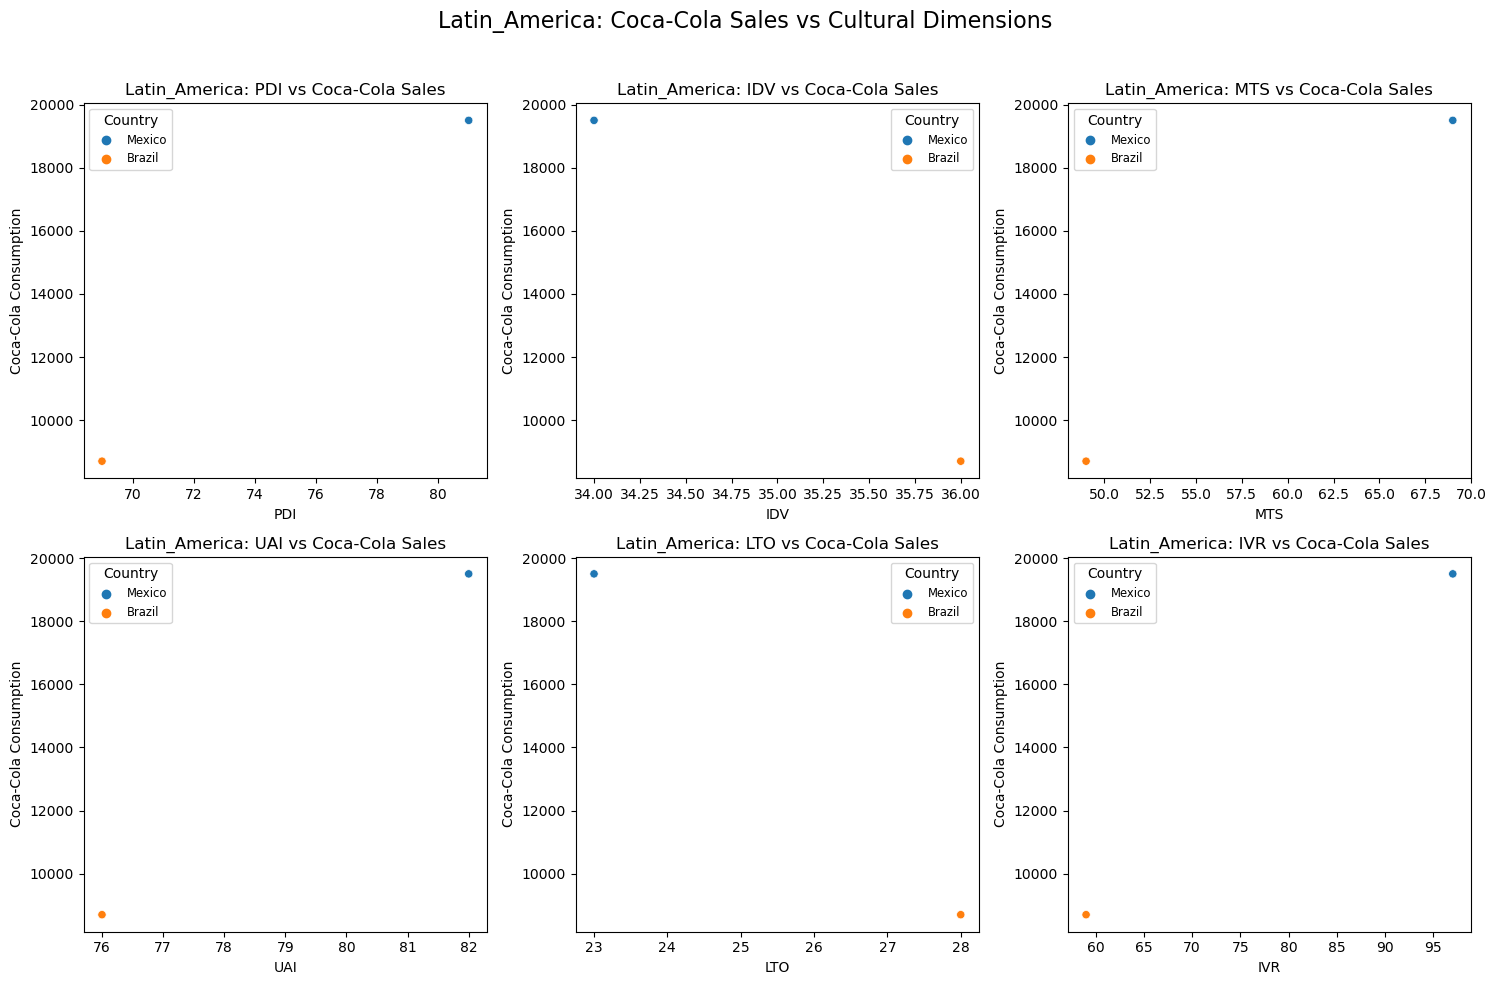

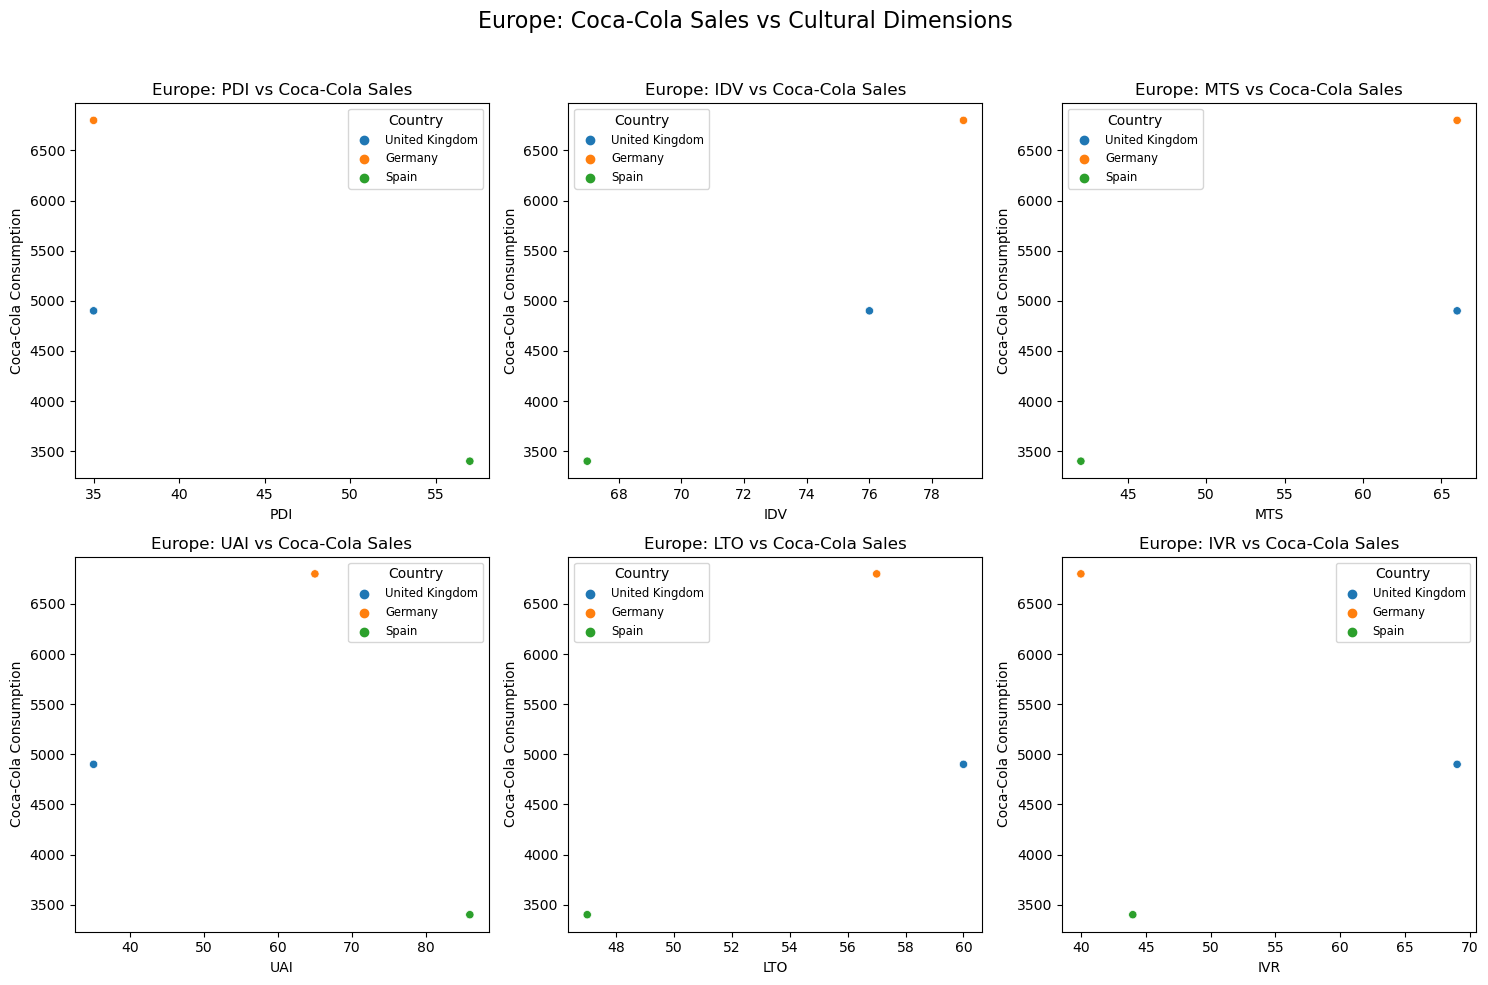

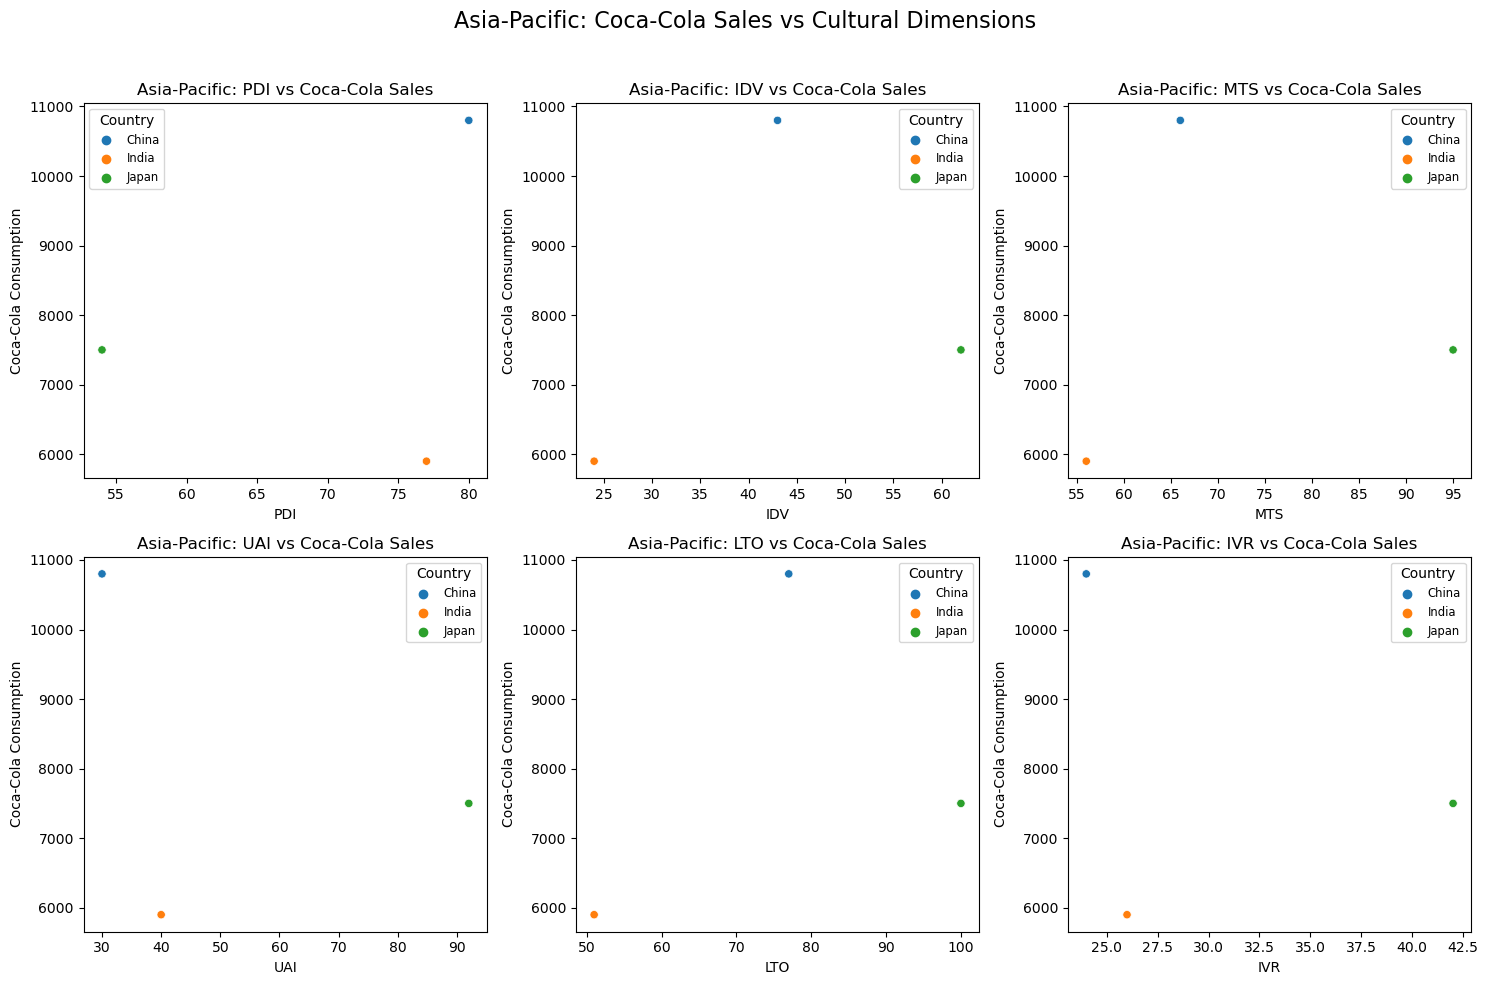

In [6]:
cultural_dimensions = ['PDI', 'IDV', 'MTS', 'UAI', 'LTO', 'IVR']

# Create scatter plots for each region
for sheet_name, df in sheets.items():
    if 'Country' in df.columns and 'Consumption of Coke in Millions of Liters 2024' in df.columns:
        plt.figure(figsize=(15, 10))
        for i, dimension in enumerate(cultural_dimensions, 1):
            plt.subplot(2, 3, i)
            sns.scatterplot(data=df, x=dimension, y='Consumption of Coke in Millions of Liters 2024', hue='Country', palette='tab10')
            plt.title(f'{sheet_name}: {dimension} vs Coca-Cola Sales')
            plt.xlabel(dimension)
            plt.ylabel('Coca-Cola Consumption')
            plt.legend(loc='best', fontsize='small', title='Country')

        plt.suptitle(f'{sheet_name}: Coca-Cola Sales vs Cultural Dimensions', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title
        plt.show()
    else:
        print(f"Missing required columns in {sheet_name}")

In [7]:
features = ['PDI', 'IDV', 'MTS', 'UAI', 'LTO', 'IVR', 'Consumption of Coke in Millions of Liters 2024']

# Cluster and visualize for each region
for sheet_name, df in sheets.items():
    if set(features).issubset(df.columns):
        # Standardize the data
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df[features])

        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        df['Cluster'] = kmeans.fit_predict(df_scaled)

        # Plot the clusters
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x='Consumption of Coke in Millions of Liters 2024', y='IDV', 
                        hue='Cluster', palette='viridis', style='Cluster', s=100)
        plt.title(f'Clustering in {sheet_name}')
        plt.xlabel('Coca-Cola Consumption (Millions of Liters, 2024)')
        plt.ylabel('Individualism (IDV)')
        plt.legend(title='Cluster')
        plt.show()

        # Display updated dataframe with clusters
        print(f"Updated Data for {sheet_name}:")
        print(df[['Country', 'Consumption of Coke in Millions of Liters 2024', 'Cluster']].head())

    else:
        print(f"Missing required columns in {sheet_name}")

ValueError: n_samples=2 should be >= n_clusters=3.

In [ ]:
# Cluster and visualize for each region
for sheet_name, df in sheets.items():
    if set(features).issubset(df.columns):
        # Ensure there are enough samples for clustering
        num_samples = df.shape[0]
        num_clusters = min(3, num_samples)  # Adjust clusters to avoid error

        if num_clusters > 0:  # Only apply clustering if we have more than 1 country
            # Standardize the data
            scaler = StandardScaler()
            df_scaled = scaler.fit_transform(df[features])

            # Perform KMeans clustering
            kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
            df['Cluster'] = kmeans.fit_predict(df_scaled)

            # Plot the clusters
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x='Consumption of Coke in Millions of Liters 2024', y='IDV', 
                            hue='Cluster', palette='viridis', style='Cluster', s=100)
            plt.title(f'Clustering in {sheet_name}')
            plt.xlabel('Coca-Cola Consumption (Millions of Liters, 2024)')
            plt.ylabel('Individualism (IDV)')
            plt.legend(title='Cluster')
            plt.show()

            # Display updated dataframe with clusters
            print(f"Updated Data for {sheet_name}:")
            print(df[['Country', 'Consumption of Coke in Millions of Liters 2024', 'Cluster']].head())
        else:
            print(f"Not enough data points for clustering in {sheet_name}, skipping.")

    else:
        print(f"Missing required columns in {sheet_name}")

In [ ]:

# Define the features for clustering
features = ['PDI', 'IDV', 'MTS', 'UAI', 'LTO', 'IVR', 'Consumption of Coke in Millions of Liters 2024']
cultural_dimensions = ['PDI', 'IDV', 'MTS', 'UAI', 'LTO', 'IVR']

# Cluster and visualize for each region
for sheet_name, df in sheets.items():
    if set(features).issubset(df.columns):
        num_samples = df.shape[0]
        num_clusters = min(3, num_samples)  # Adjust clusters to avoid errors

        if num_clusters > 1:
            # Standardize the data
            scaler = StandardScaler()
            df_scaled = scaler.fit_transform(df[features])

            # Perform KMeans clustering
            kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
            df['Cluster'] = kmeans.fit_predict(df_scaled)

            # Create scatter plots for each cultural dimension
            plt.figure(figsize=(15, 10))
            for i, dimension in enumerate(cultural_dimensions, 1):
                plt.subplot(2, 3, i)
                sns.scatterplot(data=df, x='Consumption of Coke in Millions of Liters 2024', 
                                y=dimension, hue='Cluster', palette='viridis', style='Cluster', s=100)
                plt.title(f'{sheet_name}: {dimension} vs Coca-Cola Consumption')
                plt.xlabel('Coca-Cola Consumption (Millions of Liters, 2024)')
                plt.ylabel(dimension)

            plt.suptitle(f'Clustering in {sheet_name}', fontsize=16)
            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.show()

            # Display updated dataframe with clusters
            print(f"Updated Data for {sheet_name}:")
            print(df[['Country', 'Consumption of Coke in Millions of Liters 2024', 'Cluster']].head())
        else:
            print(f"Not enough data points for clustering in {sheet_name}, skipping.")

    else:
        print(f"Missing required columns in {sheet_name}")


In [ ]:
## Correlation Analysis 

# Define relevant columns
cultural_dimensions = ['PDI', 'IDV', 'MTS', 'UAI', 'LTO', 'IVR']
target_col = 'Consumption of Coke in Millions of Liters 2024'

# Compute and visualize correlations for each region
for sheet_name, df in sheets.items():
    if set(cultural_dimensions + [target_col]).issubset(df.columns):
        correlation_matrix = df[cultural_dimensions + [target_col]].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f"Correlation Heatmap - {sheet_name}")
        plt.show()
        
# Insight: This will show which cultural traits (e.g., individualism, uncertainty avoidance) have a 
##. strong positive or negative correlation with Coca-Cola consumption.

#Must look into what it analyzing / comparing cause shouldn't be all 1s


In [ ]:
import statsmodels.api as sm

for sheet_name, df in sheets.items():
    if set(cultural_dimensions + [target_col]).issubset(df.columns):
        X = df[cultural_dimensions]  # Independent variables
        y = df[target_col]  # Dependent variable

        X = sm.add_constant(X)  # Adds an intercept term
        model = sm.OLS(y, X).fit()
        print(f"Regression Results for {sheet_name}")
        print(model.summary())


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

for sheet_name, df in sheets.items():
    if set(cultural_dimensions + [target_col]).issubset(df.columns):
        X = df[cultural_dimensions]
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Feature importance
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': cultural_dimensions, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        print(f"Feature Importance for {sheet_name}")
        print(feature_importance_df)


In [ ]:
df['Cultural_Cluster'] = df['Country'].map(cluster_mapping)  # Map countries to predefined cultural clusters

# Group by cluster and compute average Coca-Cola consumption
grouped_data = df.groupby('Cultural_Cluster')['Consumption of Coke in Millions of Liters 2024'].mean()
grouped_data.plot(kind='bar', figsize=(10, 5), title="Avg. Coca-Cola Consumption by Cultural Cluster")
plt.xlabel("Cultural Cluster")
plt.ylabel("Coca-Cola Consumption (Millions of Liters)")
plt.show()


In [ ]:
###############


sns.pairplot(df, x_vars=features, y_vars= 'Consumption of Coke in Millions of Liters 2024', kind='reg', diag_kind=None)
plt.suptitle("Relationship Between Cultural Dimensions & Coca-Cola Consumption", y=1.02)
plt.show()

In [ ]:
##########



X = df[['PDI', 'IDV', 'MTS', 'UAI', 'LTO', 'IVR', 
             'GDP in Millions(2023)', 'AVG Monthly Income', 'AVG Annual Income']]
Y = df['Consumption of Coke in Millions of Liters 2024']

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get residuals
predictions = model.predict(X)
residuals = Y - predictions

# Plot residuals
plt.figure(figsize=(8, 5))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.axhline(0, linestyle='--', color='black', linewidth=1)
plt.xlabel("Predicted Coca-Cola Consumption")
plt.ylabel("Residuals")
plt.title("Residual Plot for Multiple Linear Regression")
plt.show()

In [ ]:
print(model.params)  # This will confirm if 'const' exists

# Drop 'const' safely if it exists
if 'const' in model.params:
    coefficients = model.params.drop("const")  # Drop the intercept
else:
    coefficients = model.params  # Use all coefficients if 'const' is missing

# Sort coefficients by absolute value
coefficients_sorted = coefficients.abs().sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients_sorted.values, y=coefficients_sorted.index, palette="coolwarm")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.title("Feature Importance in Coca-Cola Consumption")
plt.show()

In [ ]:
#########

##

# 2. Polynomial Regression
# Use Case: Capture nonlinear relationships between cultural dimensions and Coca-Cola sales.

# Why? Some cultural factors might have diminishing or exponential effects on sales.
# For example, extreme individualism (IDV) might have different impacts compared to moderate levels.

###





from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features (degree 2 or 3 for capturing curvature)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model_poly = LinearRegression().fit(X_poly, Y)

# Predict and evaluate
Y_pred = model_poly.predict(X_poly)


In [ ]:
##

# 3. Decision Trees & Random Forests
# Use Case: Detect nonlinear and complex relationships while ranking the most important cultural factors.

# These models don’t assume linearity and can reveal hidden patterns.
# Random Forests reduce overfitting and provide feature importance scores.


##



from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, Y)

# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
feature_importance.plot(kind="bar", title="Feature Importance in Coca-Cola Sales")
plt.show()

In [ ]:
##

# 4. Clustering (K-Means or Hierarchical Clustering)
# Use Case: Group countries with similar cultural patterns & sales behavior.

# Helps identify market segments where Coca-Cola performs well or underperforms.
# You might find that certain clusters of cultures drive high sales, while others don't.

##



from sklearn.cluster import KMeans

# Fit K-Means with 3 clusters (adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
df_apac["Cluster"] = kmeans.fit_predict(X)

# Visualize clusters
import seaborn as sns
sns.scatterplot(x=df_apac["IDV"], y=df_apac["Consumption of Coke in Millions of Liters 2024"], hue=df_apac["Cluster"], palette="coolwarm")
plt.title("Cultural Clusters vs. Coca-Cola Sales")
plt.show()


In [ ]:
###

# 5. Principal Component Analysis (PCA)
# Use Case: Reduce dimensionality and find the most important cultural components that drive Coca-Cola sales.

# This method finds underlying patterns in cultural dimensions without redundancy.

##




from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize transformed features
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap="coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Cultural Factors Driving Coca-Cola Sales")
plt.colorbar(label="Sales")
plt.show()


In [ ]:
###


from sklearn.model_selection import train_test_split



# 2. Select the independent variables (features) and dependent variable (target)
X1 = df[['PDI', 'IDV', 'MTS', 'UAI', 'LTO', 'IVR', 'GDP in Millions(2023)', 'AVG Monthly Income']]
y1 = df['Consumption of Coke in Millions of Liters 2024']

# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# 4. Polynomial Feature Transformation
poly = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_poly_train = poly.fit_transform(X_train)

# 5. Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# 6. Make predictions
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)

# 7. Plot the results (Optional)
plt.scatter(range(len(y_test)), y_test, color='blue', label='True values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Output the results
print("Predicted Values:", y_pred)
print("Actual Values:", y_test.values)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = X1.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


NameError: name 'X1' is not defined

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant to the independent variables matrix
X_with_const = add_constant(X1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)


NameError: name 'X1' is not defined

/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/438370360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/438370360.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/438370360.py:24: SettingWithCopyWarning: 
A value

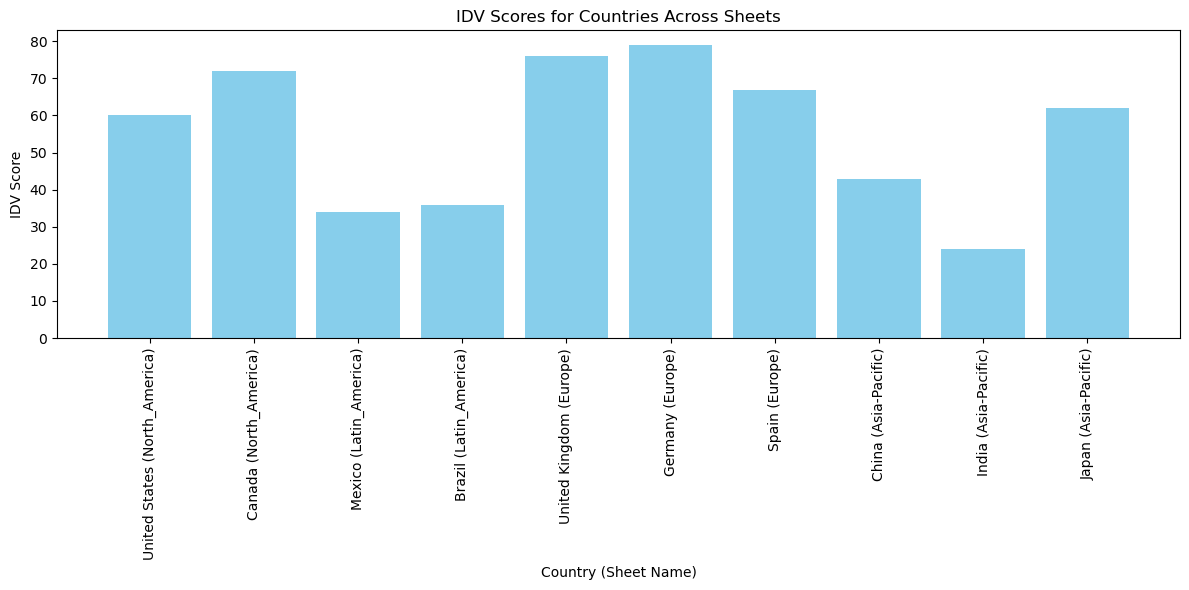

In [11]:
######





import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the Excel file with multiple sheets
file_path_2 = "Coke_Data_Data400.xlsx"  # Update with your Excel file path
excel_data = pd.ExcelFile(file_path)

# 2. Initialize an empty list to store the data from all sheets
all_data = []

# 3. Iterate through each sheet and extract the "Country" and "IDV" columns
for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)
    
    # Check if 'Country' and 'IDV' columns exist in the sheet
    if 'Country' in df.columns and 'IDV' in df.columns:
        sheet_data = df[['Country', 'IDV']]
        sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
        all_data.append(sheet_data)

# 4. Combine the data from all sheets into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# 5. Create a bar graph to visualize the "Country" scores in the "IDV" column
plt.figure(figsize=(12, 6))
plt.bar(combined_data['Country'] + " (" + combined_data['Sheet'] + ")", combined_data['IDV'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Country (Sheet Name)')
plt.ylabel('IDV Score')
plt.title('IDV Scores for Countries Across Sheets')
plt.tight_layout()
plt.show()


/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/3814727218.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/3814727218.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/3814727218.py:11: SettingWithCopyWarning: 
A va

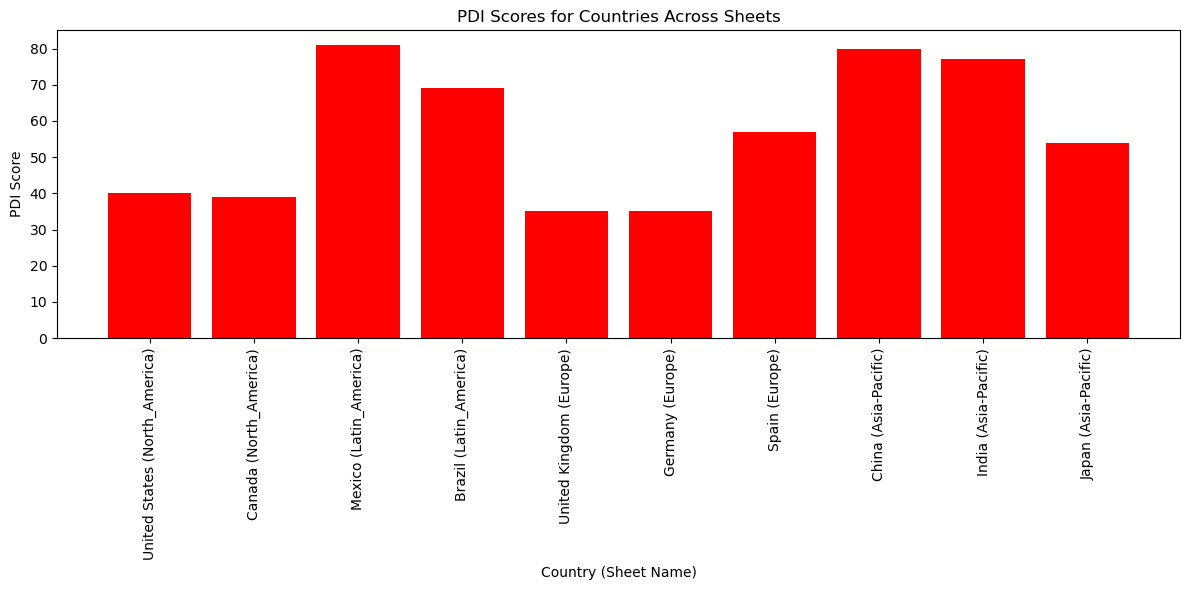

In [12]:
# 2. Initialize an empty list to store the data from all sheets
all_data = []

# 3. Iterate through each sheet and extract the "Country" and "IDV" columns
for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)
    
    # Check if 'Country' and 'IDV' columns exist in the sheet
    if 'Country' in df.columns and 'PDI' in df.columns:
        sheet_data = df[['Country', 'PDI']]
        sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
        all_data.append(sheet_data)

# 4. Combine the data from all sheets into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# 5. Create a bar graph to visualize the "Country" scores in the "IDV" column
plt.figure(figsize=(12, 6))
plt.bar(combined_data['Country'] + " (" + combined_data['Sheet'] + ")", combined_data['PDI'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Country (Sheet Name)')
plt.ylabel('PDI Score')
plt.title('PDI Scores for Countries Across Sheets')
plt.tight_layout()
plt.show()

/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/2801126327.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/2801126327.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/2801126327.py:11: SettingWithCopyWarning: 
A va

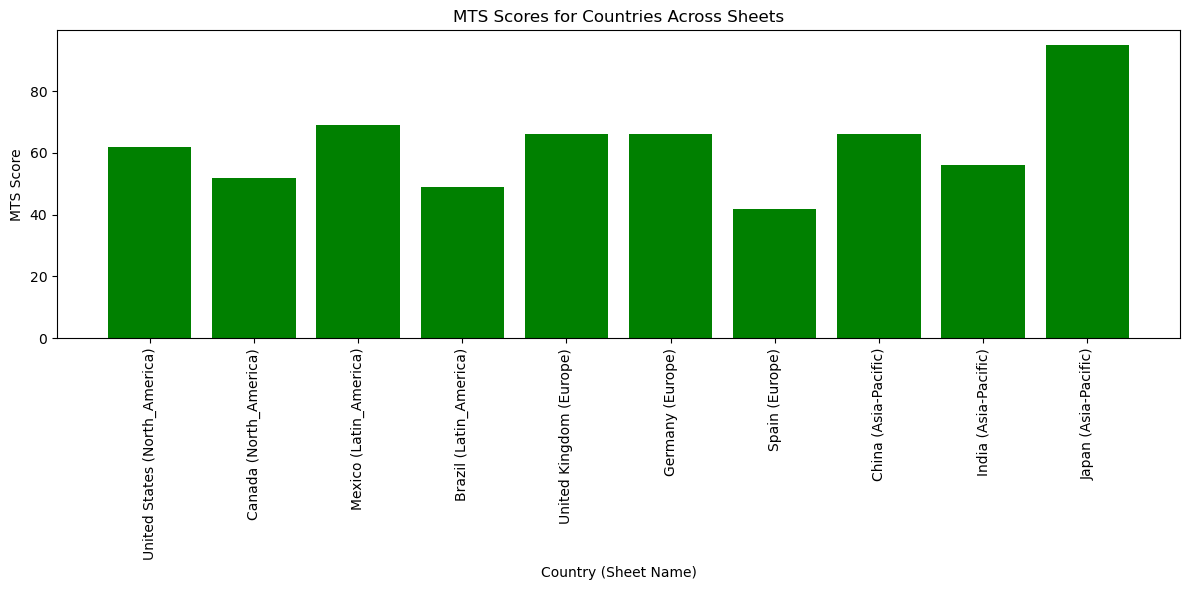

In [13]:
# 2. Initialize an empty list to store the data from all sheets
all_data = []

# 3. Iterate through each sheet and extract the "Country" and "IDV" columns
for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)
    
    # Check if 'Country' and 'IDV' columns exist in the sheet
    if 'Country' in df.columns and 'MTS' in df.columns:
        sheet_data = df[['Country', 'MTS']]
        sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
        all_data.append(sheet_data)

# 4. Combine the data from all sheets into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# 5. Create a bar graph to visualize the "Country" scores in the "IDV" column
plt.figure(figsize=(12, 6))
plt.bar(combined_data['Country'] + " (" + combined_data['Sheet'] + ")", combined_data['MTS'], color='green')
plt.xticks(rotation=90)
plt.xlabel('Country (Sheet Name)')
plt.ylabel('MTS Score')
plt.title('MTS Scores for Countries Across Sheets')
plt.tight_layout()
plt.show()

/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/4135309120.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/4135309120.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/4135309120.py:11: SettingWithCopyWarning: 
A va

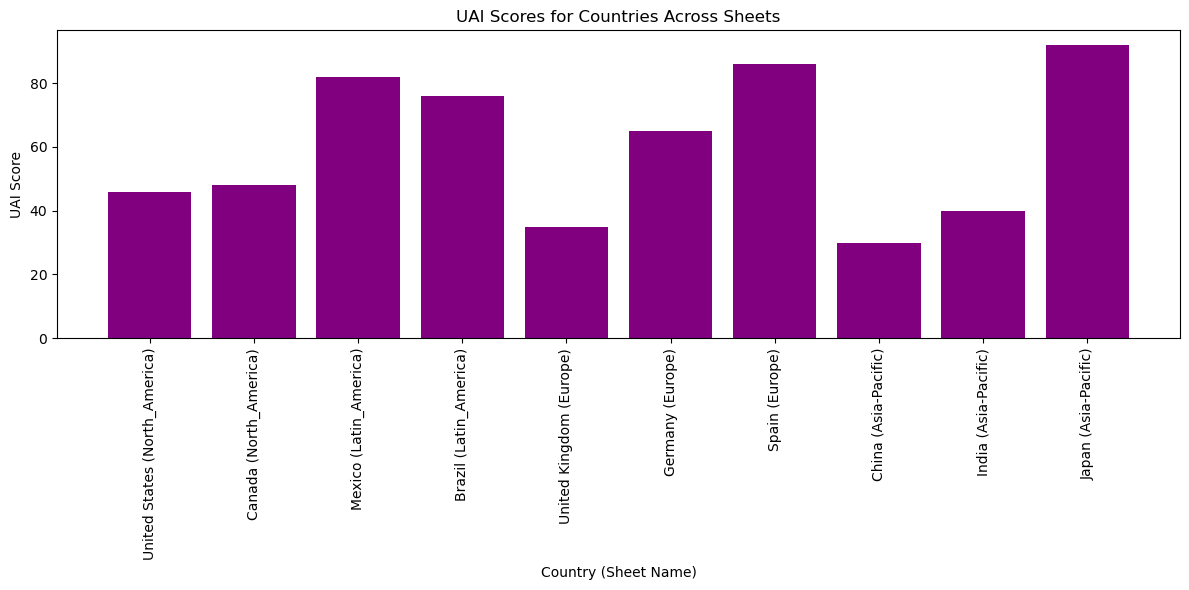

In [14]:
# 2. Initialize an empty list to store the data from all sheets
all_data = []

# 3. Iterate through each sheet and extract the "Country" and "IDV" columns
for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)
    
    # Check if 'Country' and 'IDV' columns exist in the sheet
    if 'Country' in df.columns and 'UAI' in df.columns:
        sheet_data = df[['Country', 'UAI']]
        sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
        all_data.append(sheet_data)

# 4. Combine the data from all sheets into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# 5. Create a bar graph to visualize the "Country" scores in the "IDV" column
plt.figure(figsize=(12, 6))
plt.bar(combined_data['Country'] + " (" + combined_data['Sheet'] + ")", combined_data['UAI'], color='purple')
plt.xticks(rotation=90)
plt.xlabel('Country (Sheet Name)')
plt.ylabel('UAI Score')
plt.title('UAI Scores for Countries Across Sheets')
plt.tight_layout()
plt.show()

/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/195377958.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/195377958.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/195377958.py:11: SettingWithCopyWarning: 
A value

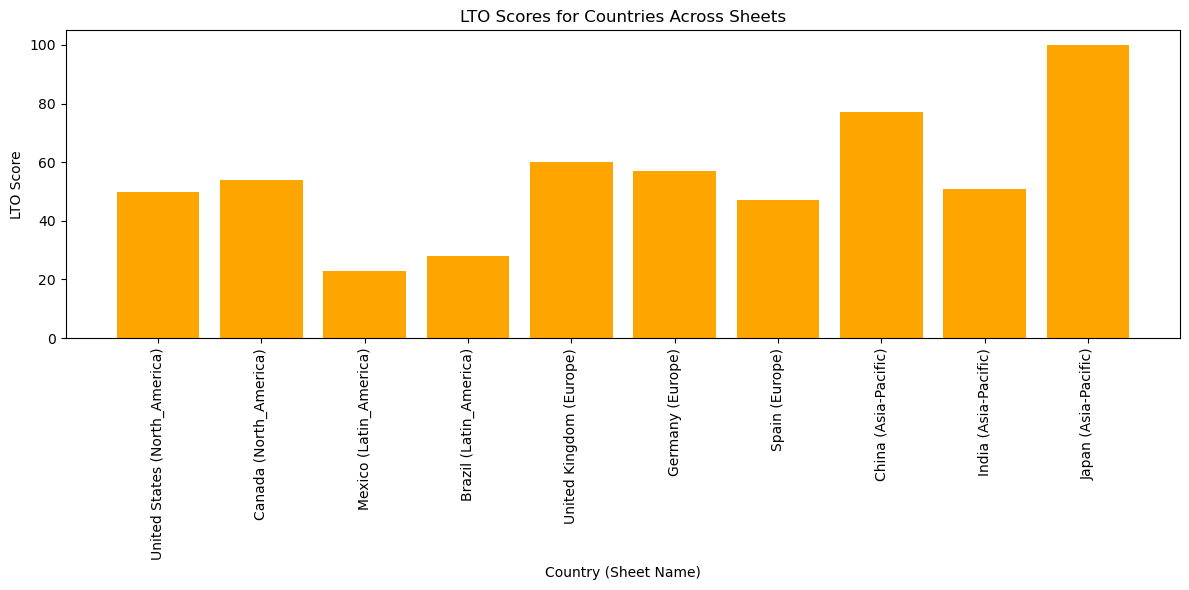

In [15]:
# 2. Initialize an empty list to store the data from all sheets
all_data = []

# 3. Iterate through each sheet and extract the "Country" and "IDV" columns
for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)
    
    # Check if 'Country' and 'IDV' columns exist in the sheet
    if 'Country' in df.columns and 'LTO' in df.columns:
        sheet_data = df[['Country', 'LTO']]
        sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
        all_data.append(sheet_data)

# 4. Combine the data from all sheets into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# 5. Create a bar graph to visualize the "Country" scores in the "IDV" column
plt.figure(figsize=(12, 6))
plt.bar(combined_data['Country'] + " (" + combined_data['Sheet'] + ")", combined_data['LTO'], color='orange')
plt.xticks(rotation=90)
plt.xlabel('Country (Sheet Name)')
plt.ylabel('LTO Score')
plt.title('LTO Scores for Countries Across Sheets')
plt.tight_layout()
plt.show()

/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/3592089344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/3592089344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/3592089344.py:11: SettingWithCopyWarning: 
A va

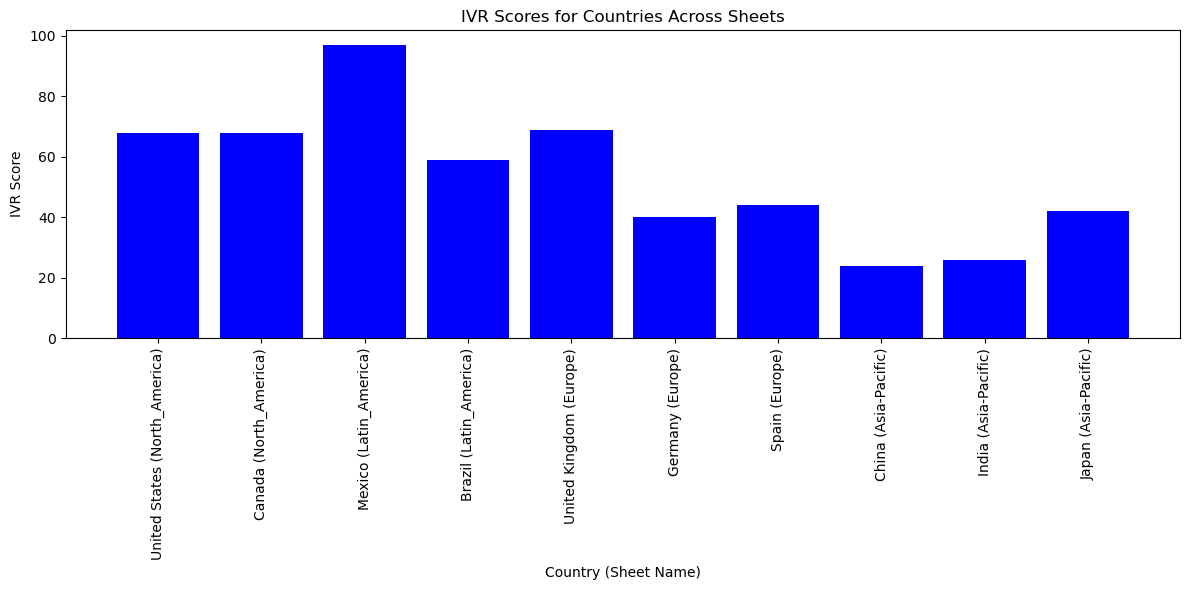

In [16]:
# 2. Initialize an empty list to store the data from all sheets
all_data = []

# 3. Iterate through each sheet and extract the "Country" and "IDV" columns
for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)
    
    # Check if 'Country' and 'IDV' columns exist in the sheet
    if 'Country' in df.columns and 'IVR' in df.columns:
        sheet_data = df[['Country', 'IVR']]
        sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
        all_data.append(sheet_data)

# 4. Combine the data from all sheets into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# 5. Create a bar graph to visualize the "Country" scores in the "IDV" column
plt.figure(figsize=(12, 6))
plt.bar(combined_data['Country'] + " (" + combined_data['Sheet'] + ")", combined_data['IVR'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Country (Sheet Name)')
plt.ylabel('IVR Score')
plt.title('IVR Scores for Countries Across Sheets')
plt.tight_layout()
plt.show()

/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/1694181283.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/1694181283.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/1694181283.py:11: SettingWithCopyWarning: 
A va

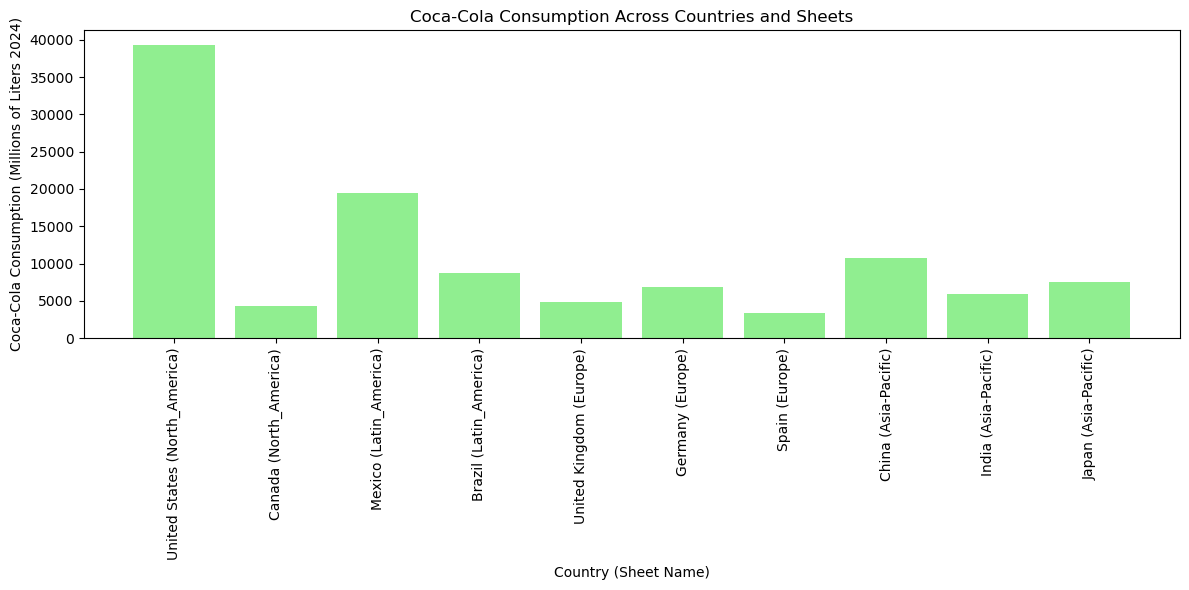

In [18]:
# 2. Initialize an empty list to store the data from all sheets
all_data = []

# 3. Iterate through each sheet and extract the "Country" and "Consumption of Coke in Millions of Liters 2024" columns
for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)
    
    # Check if 'Country' and 'Consumption of Coke in Millions of Liters 2024' columns exist in the sheet
    if 'Country' in df.columns and 'Consumption of Coke in Millions of Liters 2024' in df.columns:
        sheet_data = df[['Country', 'Consumption of Coke in Millions of Liters 2024']]
        sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
        all_data.append(sheet_data)

# 4. Combine the data from all sheets into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# 5. Create a bar graph to visualize the "Country" and Coca-Cola consumption in liters (Millions of Liters 2024)
plt.figure(figsize=(12, 6))
plt.bar(combined_data['Country'] + " (" + combined_data['Sheet'] + ")", combined_data['Consumption of Coke in Millions of Liters 2024'], color='lightgreen')
plt.xticks(rotation=90)
plt.xlabel('Country (Sheet Name)')
plt.ylabel('Coca-Cola Consumption (Millions of Liters 2024)')
plt.title('Coca-Cola Consumption Across Countries and Sheets')
plt.tight_layout()
plt.show()


/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/237832105.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/237832105.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
/var/folders/jr/j6xlk3cj1xqct04zt5g664h80000gn/T/ipykernel_38896/237832105.py:11: SettingWithCopyWarning: 
A value

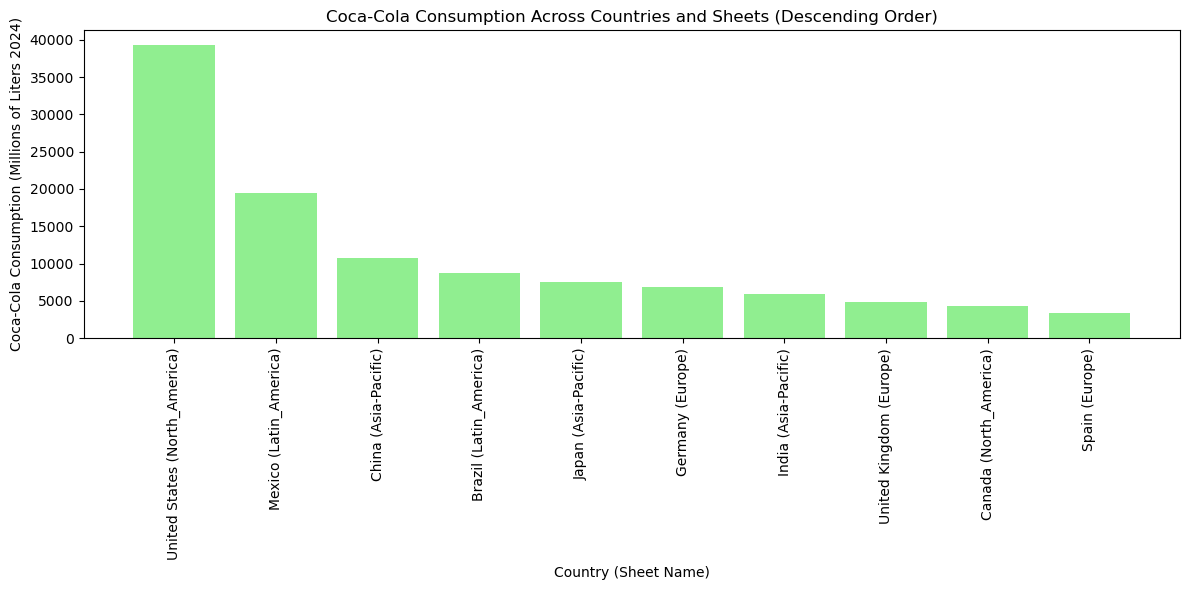

In [20]:
# 2. Initialize an empty list to store the data from all sheets
all_data = []

# 3. Iterate through each sheet and extract the "Country" and "Consumption of Coke in Millions of Liters 2024" columns
for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)
    
    # Check if 'Country' and 'Consumption of Coke in Millions of Liters 2024' columns exist in the sheet
    if 'Country' in df.columns and 'Consumption of Coke in Millions of Liters 2024' in df.columns:
        sheet_data = df[['Country', 'Consumption of Coke in Millions of Liters 2024']]
        sheet_data['Sheet'] = sheet_name  # Add the sheet name as a new column
        all_data.append(sheet_data)

# 4. Combine the data from all sheets into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# 5. Sort the data by 'Consumption of Coke in Millions of Liters 2024' in descending order
combined_data = combined_data.sort_values(by='Consumption of Coke in Millions of Liters 2024', ascending=False)

# 6. Create a bar graph to visualize the "Country" and Coca-Cola consumption in liters (Millions of Liters 2024)
plt.figure(figsize=(12, 6))
plt.bar(combined_data['Country'] + " (" + combined_data['Sheet'] + ")", combined_data['Consumption of Coke in Millions of Liters 2024'], color='lightgreen')
plt.xticks(rotation=90)
plt.xlabel('Country (Sheet Name)')
plt.ylabel('Coca-Cola Consumption (Millions of Liters 2024)')
plt.title('Coca-Cola Consumption Across Countries and Sheets (Descending Order)')
plt.tight_layout()
plt.show()
